## Classification problem with different ML algorithms

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import warnings
import time

warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv('Datasets/breast_cancer.csv')

In [140]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [141]:
df.shape

(569, 33)

In [142]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [143]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [144]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [145]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## Data Visualization and pre-processing

### First thing to do is to enumerate the diagnosis column such that M = 1, B = 0. Then, I set the ID column to be the index of the dataframe. Afterall, the ID column will not be used for machine learning

In [146]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
df['diagnosis'] = df['diagnosis'].astype(int)

In [147]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

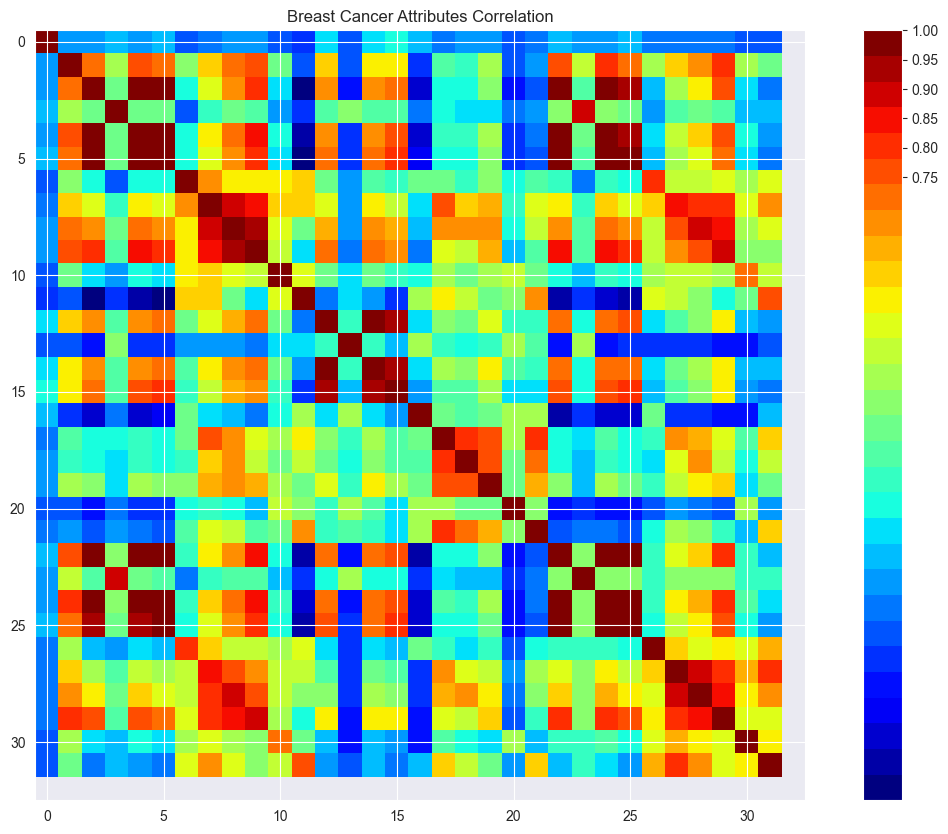

In [148]:
from matplotlib import cm as cm

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [149]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


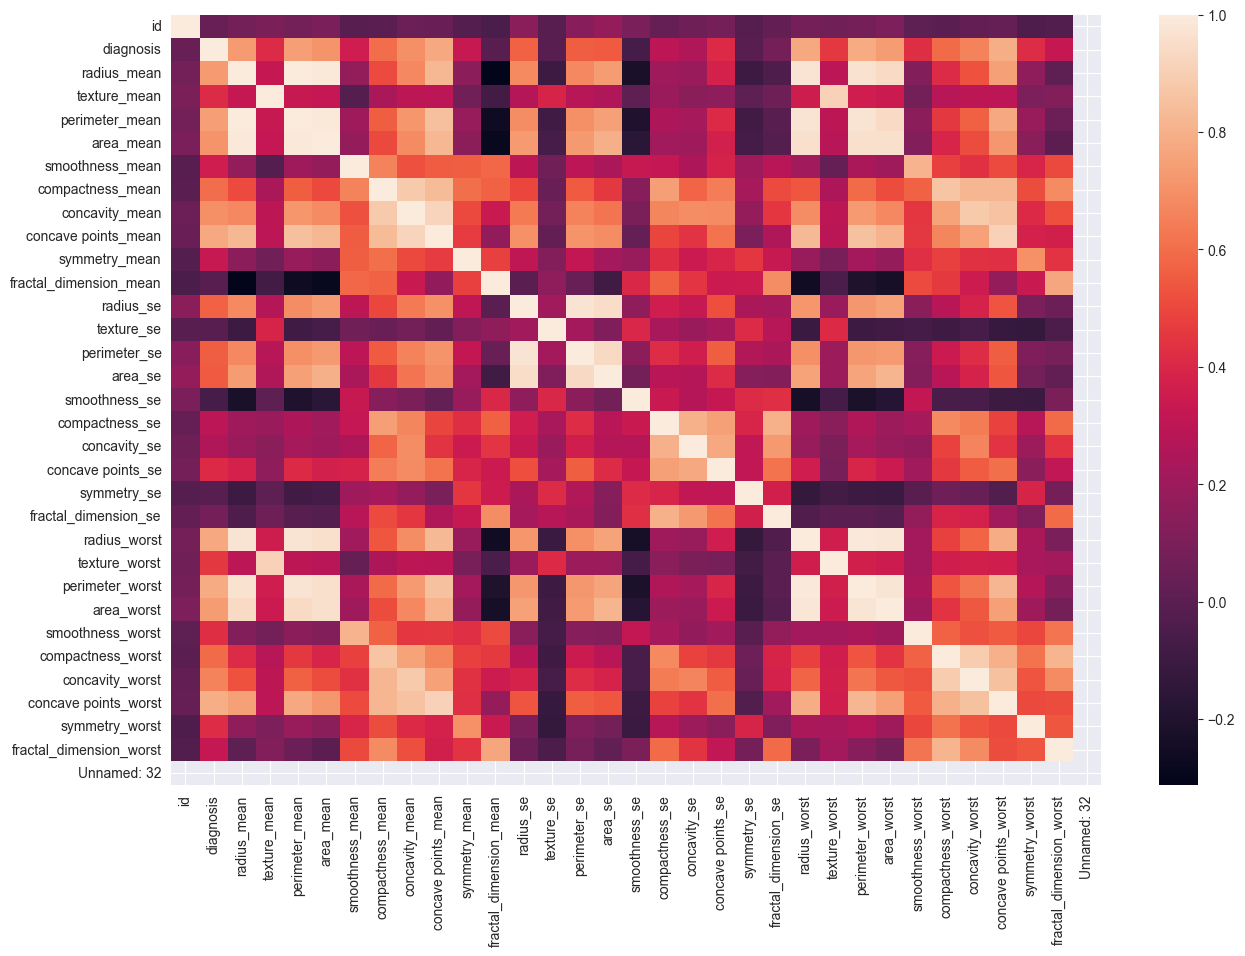

In [150]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.show()

In [151]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [152]:
df.drop('id', axis=1, inplace=True)

In [153]:
df.shape

(569, 31)

In [154]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [155]:
X= df.drop('diagnosis', axis=1)
y= df['diagnosis']

In [166]:
cat_features = [features for features in df.columns if df[features].dtype == 'O']
num_features = [features for features in df.columns if df[features].dtype != 'O']

In [167]:
num_features

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [157]:
df['diagnosis'].dtype

dtype('int64')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [159]:
X.shape, y.shape

((569, 30), (569,))

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [161]:
models={
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "NB": GaussianNB(),
    "AdaBoost":AdaBoostClassifier(),
    "GradientBoost": GradientBoostingClassifier()
}

In [162]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  #Train model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # -------------------- Training Metrics --------------------
    model_train_accuracy = accuracy_score(y_train, y_train_pred)

    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred)

    print(f'Model : {list(models.keys())[i]}')
    print("\n===== TRAINING METRICS =====")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    # print("\nConfusion Matrix:\n", train_conf_matrix)
    # print("\nClassification Report:\n", train_class_report)

    # -------------------- Test Metrics --------------------
    model_test_accuracy = accuracy_score(y_test, y_test_pred)

    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    print("\n===== TEST METRICS =====")
    print(f"Accuracy: {model_test_accuracy:.4f}")
    # print("\nConfusion Matrix:\n", test_conf_matrix)
    # print("\nClassification Report:\n", test_class_report)

    print("==" *30)

Model : Decision Tree

===== TRAINING METRICS =====
Accuracy: 1.0000

===== TEST METRICS =====
Accuracy: 0.9474
Model : SVM

===== TRAINING METRICS =====
Accuracy: 0.9143

===== TEST METRICS =====
Accuracy: 0.9474
Model : Logistic Regression

===== TRAINING METRICS =====
Accuracy: 0.9495

===== TEST METRICS =====
Accuracy: 0.9561
Model : KNN

===== TRAINING METRICS =====
Accuracy: 0.9407

===== TEST METRICS =====
Accuracy: 0.9561
Model : Random Forest

===== TRAINING METRICS =====
Accuracy: 1.0000

===== TEST METRICS =====
Accuracy: 0.9649
Model : NB

===== TRAINING METRICS =====
Accuracy: 0.9363

===== TEST METRICS =====
Accuracy: 0.9737
Model : AdaBoost

===== TRAINING METRICS =====
Accuracy: 1.0000

===== TEST METRICS =====
Accuracy: 0.9649
Model : GradientBoost

===== TRAINING METRICS =====
Accuracy: 1.0000

===== TEST METRICS =====
Accuracy: 0.9561


In [163]:
num_folds = 10
results = []
names = []

for name, model in models.items():
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Decision Tree: 0.914444 (0.044158) (run time: 0.207803)
SVM: 0.907488 (0.065527) (run time: 0.070687)
Logistic Regression: 0.938502 (0.032176) (run time: 0.278964)
KNN: 0.914058 (0.057105) (run time: 0.079170)
Random Forest: 0.969130 (0.026589) (run time: 2.265527)
NB: 0.936184 (0.028702) (run time: 0.073155)
AdaBoost: 0.960386 (0.027467) (run time: 1.611742)
GradientBoost: 0.951643 (0.023726) (run time: 5.706155)


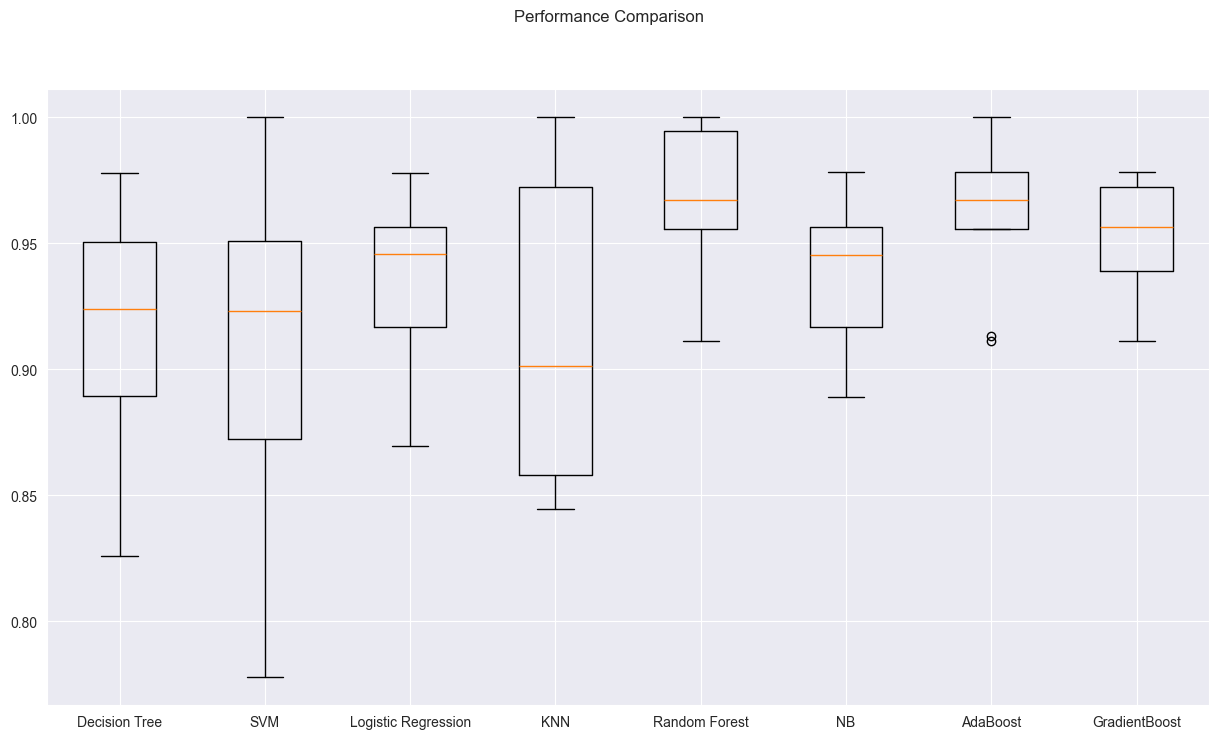

In [164]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [169]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('Decision Tree',DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledLogistoc', Pipeline([('Scaler', StandardScaler()),('Logistic',LogisticRegression())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('Random Forest',RandomForestClassifier())])))
pipelines.append(('ScaledAdaBoost', Pipeline([('Scaler', StandardScaler()),('AdaBoost',AdaBoostClassifier())])))
pipelines.append(('ScaledGradientBoost', Pipeline([('Scaler', StandardScaler()),('GradientBoost',GradientBoostingClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.934251 (0.036266) (run time: 0.510544)
ScaledSVM: 0.973671 (0.013128) (run time: 0.081231)
ScaledNB: 0.929614 (0.029311) (run time: 0.055856)
ScaledLogistoc: 0.969227 (0.022609) (run time: 0.128584)
ScaledRF: 0.958213 (0.026976) (run time: 1.873551)
ScaledAdaBoost: 0.960386 (0.027467) (run time: 1.479229)
ScaledGradientBoost: 0.953816 (0.025033) (run time: 5.091954)
ScaledKNN: 0.964686 (0.024705) (run time: 0.106926)


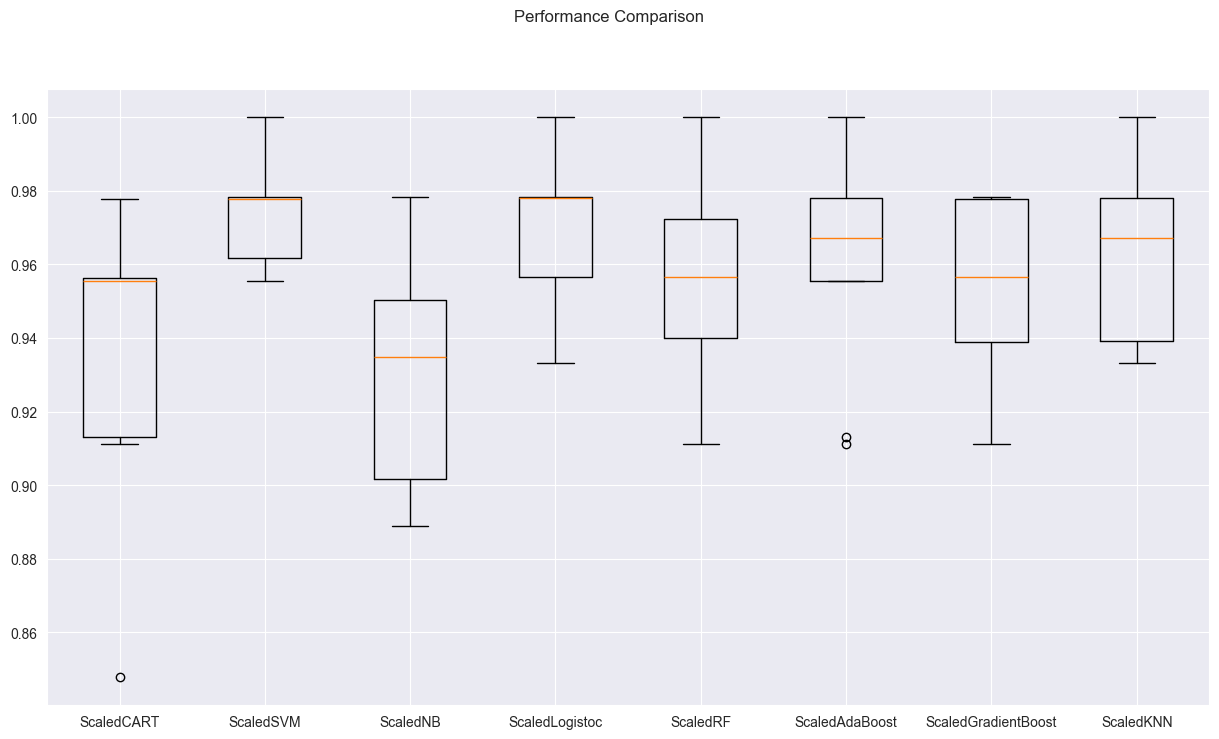

In [171]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()